In [280]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_state_qsphere
import random
backend = Aer.get_backend('qasm_simulator')

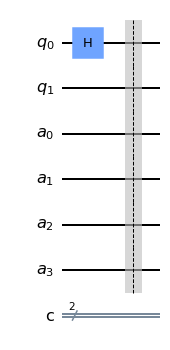

In [290]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(4,'a')
cr= ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,a,cr)
circuit.h(0)
circuit.barrier()
circuit.draw("mpl")

The noise is: IX


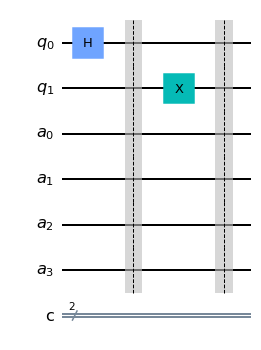

In [291]:
#r = random.randint(1,30) # for the cases ZX, ZI and IX
r = 27
if r<=20:
    print('The noise is: ZX')
    circuit.z(0)
    circuit.x(1)
elif r<=25 and r>20:
    print('The noise is: ZI')
    circuit.z(0)
elif r<=30 and r>25:
    print('The noise is: IX')
    circuit.x(1)
circuit.barrier()
circuit.draw("mpl")

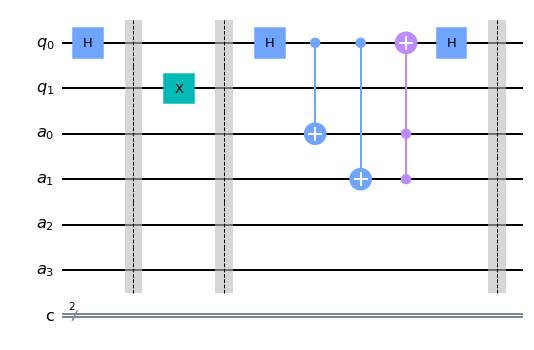

In [292]:
# Negating phase flip error
circuit.h(0)
circuit.cx(qr[0],a[0])
circuit.cx(qr[0],a[1])
circuit.ccx(a[1],a[0],qr[0])
circuit.h(0)
circuit.barrier()
circuit.draw("mpl")

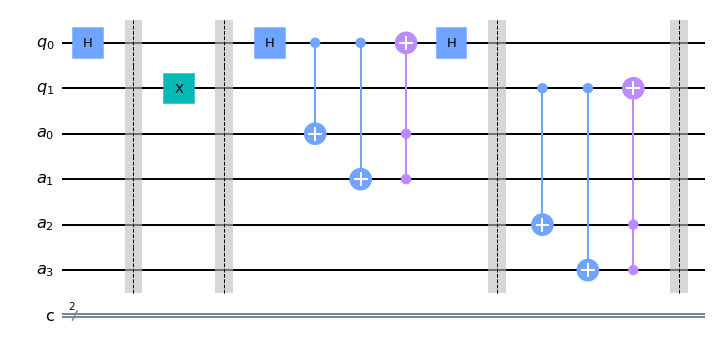

In [293]:
# Negating bit flip error
circuit.cx(qr[1],a[2])
circuit.cx(qr[1],a[3])
circuit.ccx(a[3],a[2],qr[1])
circuit.barrier()
circuit.draw("mpl")

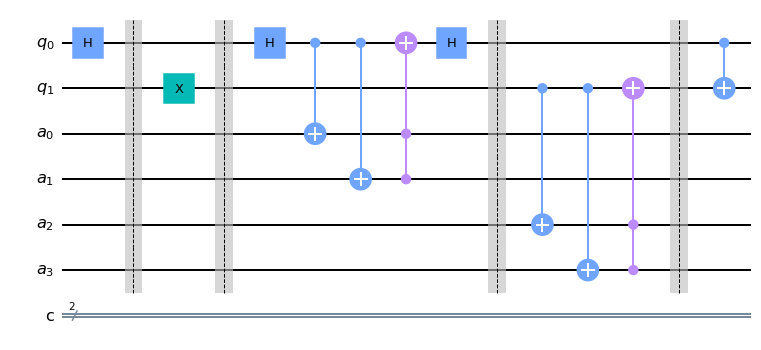

In [294]:
circuit.cx(0,1)
circuit.draw("mpl")

In [295]:
# circuit.measure(qr,cr)
# job = execute(circuit, backend, shots=1000)
# job_monitor(job)
# counts = execute(circuit,backend).result().get_counts()
# plot_histogram(counts)

In [296]:
#print(counts)

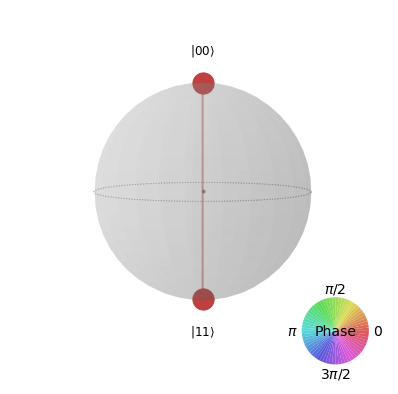

In [312]:
state = Statevector.from_instruction(circuit)
rstate = partial_trace(state, [2,3,4,5,])
plot_state_qsphere(rstate)